<a href="https://colab.research.google.com/github/droyktton/clases_ME_IB/blob/main/ME_2025_condensaci%C3%B3n_de_Bose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bosones en una caja

La idea de hacer este cálculo numéricamente la saque del libro [*Statistical Mechanics: Algorithms and Computations* de Werner Krauth](https://www.amazon.com/Statistical-Mechanics-Algorithms-Computations-Physics/dp/0198515367).

La idea es sencilla:

* Considerar estados de una partícula sin espín en una caja de dimensiones $L \times L \times L$ con condiciones periódicas de contorno (hasta una energía máxima para evitar hacer sumas infinitas). Los estados que están más arriba son irrelevantes a bajas $T$.

* Calcular una densidad de estados discreta, es decir guardar en un histograma solo la degeneración de las energías posibles.

* Fijar $N$, $V$ (densidad $n=N/V$) y $T$ y calcular el potencial químico usando un método de bisección.

* Teniendo $\mu(n,T)$ o $z=\exp(\beta \mu)$ calcular la fracción condensada $N_0/N$ vs $T$, y dibujar ambos.

Todo el cálculo numérico está adimensionalizado. Las energías $E$ o $\mu$ se miden en unidades de $E_0=\hbar^2 (2\pi/L)^2/2m$, la temperatura en unidades de $T_0=E_0/k_B$. y las distancias en unidades de $L_0=L$.
En estas unidades queda

\begin{align}
E &= n_x^2 + n_y^2 + n_z^2, \;\;\; (n_x,n_y,n_z =-n_{max}, \dots ,n_{max}) \\
N &= \sum_{E=0}^{E_{max}} \frac{{\cal N}(E)}{e^{(E-\mu)/T}-1} \\
N_0 &= \frac{1}{z^{-1}-1} \\
z &= e^{\mu/T}
\end{align}

>Notar que estamos usando condiciones de contorno periódicas. Por eso $E_0=\hbar^2 (2\pi/L)^2/2m$ y $n_\alpha=-n_{max},\dots, n_{max}$ y el estado fundamental tiene energía cero (ya que $n_x=n_y=n_z=0$ en el fundamental, con función de onda constante).. Si fueran cerradas deberíamos poner $E_0=\hbar^2 (\pi/L)^2/2m$ y $n_\alpha=1,\dots, n_{max}$ y el estado fundamental tendría energía $3 \hbar^2 (\pi/L)^2/2m \equiv 3E_0$ (ya que $n_x=n_y=n_z=1$ en el fundamental, con función de onda medio seno).

## Definición de la densidad de estados discreta ${\cal N}(E)$

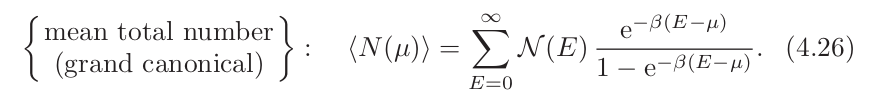

## Pseudocódigo para la densidad de estados de una partícula discreta ${\cal N}(E)$.

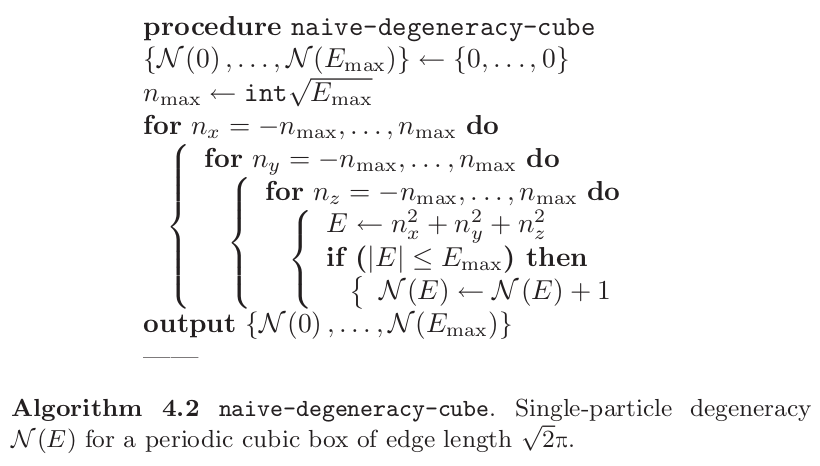

## Pseudocódigo para estimar $\mu$ a $N$ y $T$ fijos

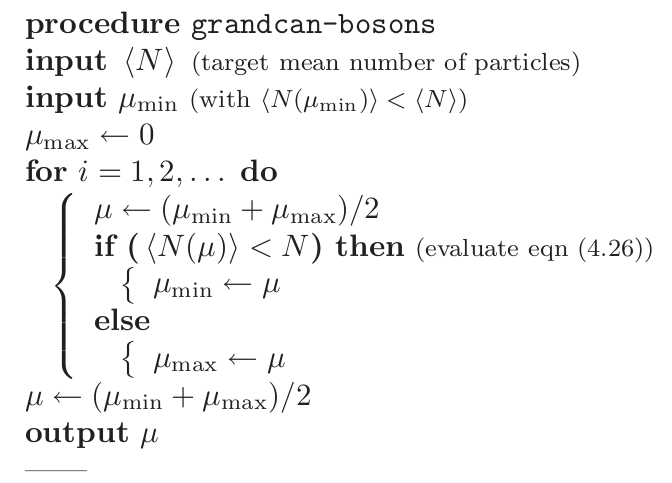

/tmp/ipython-input-3482645537.py:50: RuntimeWarning: divide by zero encountered in divide
  plt.plot(energies, 1.0/(np.exp((1./T)*np.array(energies))-1),label="<n_k>(T="+str(T)+")")


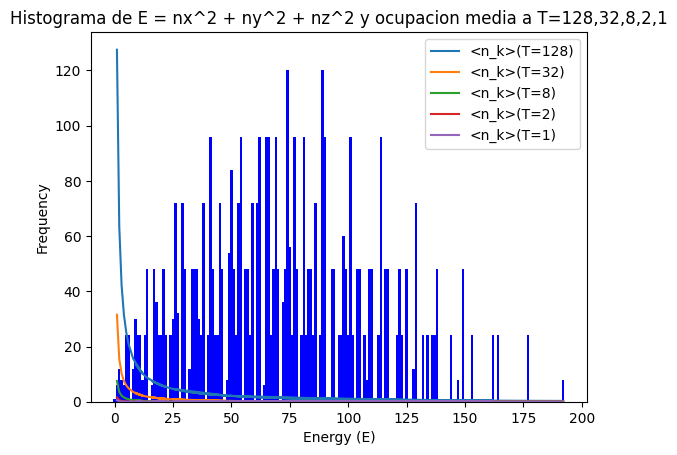

T= 1.0
mu T N N0
-0.005143767975823721 1.0 200 193.91044183204855 0.9695522091602428
-0.002022719320393662 1.0 500 493.8841346978535 0.9877682693957069
-0.0010056563681359876 1.0 1000 993.8755302145083 0.9938755302145084
-0.0005014111675194499 1.0 2000 1993.8712580200324 0.9969356290100162
-0.0002002255064859071 1.0 5000 4993.868704023653 0.9987737408047306
-0.00010005635326937323 1.0 10000 9993.867855312672 0.9993867855312671
-5.00140854009512e-05 1.0 20000 19993.86743049628 0.9996933715248141
-2.0002253384165947e-05 1.0 50000 49993.86717612587 0.9998773435225173
-1.0000563322766498e-05 1.0 100000 99993.86709050274 0.9999386709050274


T= 2.0
mu T N N0
-0.01130421987909358 2.0 200 176.42555043865906 0.8821277521932953
-0.004194863515749603 2.0 500 476.27373189715877 0.9525474637943175
-0.0020476540868230586 2.0 1000 976.2275574394213 0.9762275574394212
-0.0010117846677815123 2.0 2000 1976.205228237733 0.9881026141188666
-0.0004018733690713816 2.0 5000 4976.192064342683 0.9952384128685

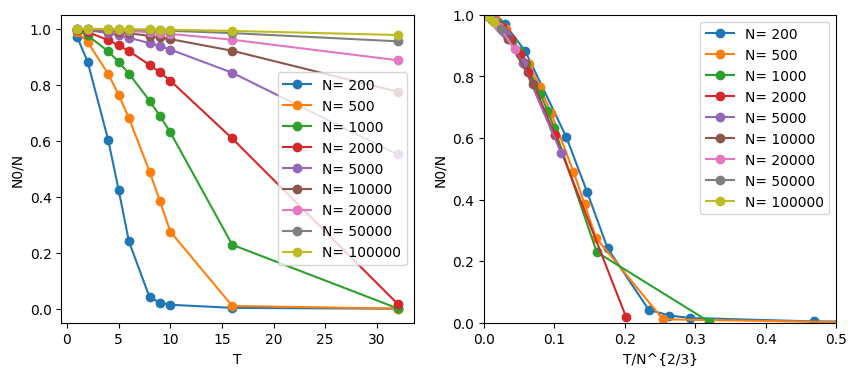

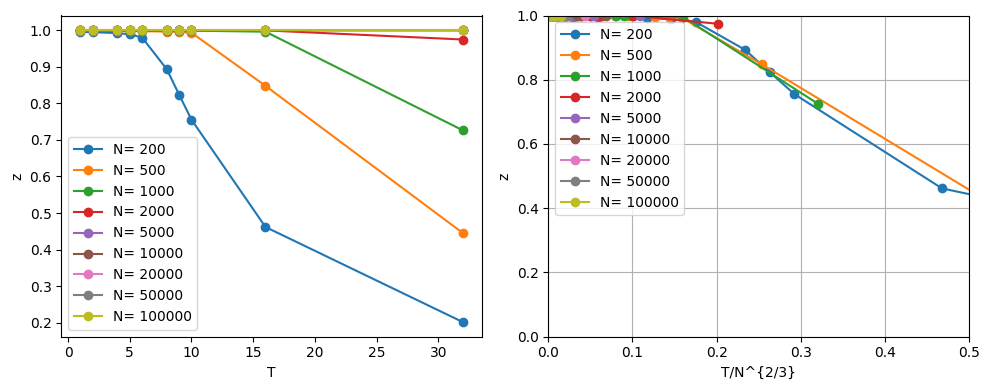

In [3]:
#@title Cálculo numérico de la fracción condensada $N_0/N$ vs $T$

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Calcula densidad de estados discreta hasta una Emax=nmax^2
## Todo esta adimensionalizado, Equivalente a usar hbar=m=L=1
## INPUT: nmax, fija la energia maxima
## OUTPUT: densidad de estados discreta, histogram
def compute_histogram_caja(nmax):
    histogram = {}

    for nx in range(-nmax, nmax + 1):
        for ny in range(-nmax, nmax + 1):
            for nz in range(-nmax, nmax + 1):

                E = nx**2 + ny**2 + nz**2

                if E in histogram:
                    histogram[E] += 1
                else:
                    histogram[E] = 1

    return histogram


## A partir de la temperatura 1/b y el potencial quimico mu da el numero medio total de particulas
## Usamos estadistica de Bose-Einstein en el numero medio por estado
## INPUTS: potencial quimico u, inversa temperatura b, densidad de estados histogram
## OUTPUT: numero medio de particulas total
def calculate_mean_number_of_particles(u, b, histogram,nmax):
    mean_number_of_particles = 0.0

    for E, count in histogram.items():
        if E <= 3 * nmax**2:
            # Sum over energies: kB=1
            mean_number_of_particles += count * np.exp(-b * (E - u)) / (1 - np.exp(-b * (E - u)))

    return mean_number_of_particles


## Dibuja densidad de estados discreta
def plot_histogram(histogram):
    energies = list(histogram.keys())
    frequencies = list(histogram.values())

    plt.bar(energies, frequencies, width=1.0, color='blue')
    for T in [128,32,8,2,1]:
      plt.plot(energies, 1.0/(np.exp((1./T)*np.array(energies))-1),label="<n_k>(T="+str(T)+")")
    #plt.scatter(energies, 10*np.array(energies)**0.5)

    plt.legend(loc="upper right")
    plt.xlabel('Energy (E)')
    plt.ylabel('Frequency')
    plt.title('Histograma de E = nx^2 + ny^2 + nz^2 y ocupacion media a T=128,32,8,2,1')
    plt.show()

## Método de bisección para encontrar mu dado numero medio total de partículas N.
## INPUT: u_guess (potencial químico inicial), b (1/T), densidad de estados (histogram)
## OUTPUT: potencial químico mu ajustado según tolerancia en N y máximo número de iteraciones
def adjust_u_to_target_N(u_guess, b, target_N, histogram, nmax, tolerance=1e-6, max_iterations=1000):
    umin = u_guess
    umax = 0.0

    for _ in range(max_iterations):
        mid = (umax + umin) / 2
        mid_N = calculate_mean_number_of_particles(mid, b, histogram, nmax)

        if np.abs(mid_N - target_N) < tolerance:
            return mid

        if mid_N < target_N:
            umin = mid
        else:
            umax = mid

    raise ValueError("Bisection method did not converge.")


## Dada una lista de temperaturas y numero de particulas
## Calcula los potenciales quimicos y la fraccion condensada
if __name__ == "__main__":
    nmax = 8  # max energy 3*nmax^2

    histogram = compute_histogram_caja(nmax)
    #histogram = compute_histogram_trampa(nmax)

    plot_histogram(histogram)

    expo=2./3.

    # particle numbers
    NList=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
    #NList=[100, 1000,10000]

    # temperatures
    TList=[1,2,4,5,6,8,9,10,16,32]

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig2, axs2 = plt.subplots(1, 2, figsize=(10, 4))

    # En cada fila: N0/N vs mu a T fija
    # En cada columna: N0/N vs T a N fijo
    CondensateFraction = []

    for T in TList:
      u_guess=-100.
      b=1.0/T
      print("T=",1/b)
      print("mu","T", "N", "N0")

      row=[]
      for N in NList:
        u_adjusted=adjust_u_to_target_N(u_guess, b, N, histogram, nmax)
        N0 = 1/(np.exp(-b*u_adjusted)-1.0)
        print(u_adjusted,1/b, N, N0, N0/N)
        row.append(N0/N)

      CondensateFraction.append(row)
      print("\n")

    num_cols = len(CondensateFraction[0])
    for col in range(num_cols):
      column_values = [row[col] for row in CondensateFraction]  # Extrae N0/N vs T
      # Create a plot for each column
      N=NList[col]
      z = np.array(column_values)*N/(1+np.array(column_values)*N)
      axs[0].plot(np.array(TList),column_values, label=f'N= {N}', linestyle='-', marker='o')
      axs[1].plot(np.array(TList)/N**expo,column_values, label=f'N= {N}', linestyle='-', marker='o')
      axs2[0].plot(np.array(TList),z, label=f'N= {N}', linestyle='-', marker='o')
      axs2[1].plot(np.array(TList)/N**expo,z, label=f'N= {N}', linestyle='-', marker='o')

    axs[0].set_xlabel('T')
    axs[0].set_ylabel('N0/N')
    axs[0].legend()

    axs[1].set_xlim(0, 0.5)
    axs[1].set_ylim(0, 1.0)
    axs[1].set_xlabel('T/N^{2/3}')
    axs[1].set_ylabel('N0/N')
    axs[1].legend()

    axs2[0].set_xlabel('T')
    axs2[0].set_ylabel('z')
    axs2[0].legend()

    axs2[1].set_xlim(0, 0.5)
    axs2[1].set_ylim(0, 1.0)
    axs2[1].set_xlabel('T/N^{2/3}')
    axs2[1].set_ylabel('z')
    axs2[1].legend()

    plt.tight_layout()
    plt.grid(True)
    plt.show()

